In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [2]:
#Distribución a-priori:
Prior =  np.array([0.2,0.8])
#Estados del sistema
States = np.array([0,1])

In [3]:
#Matriz de Transición:
T=np.array([[0.8,0.2],[0.2,0.8]])
#Matriz de Emisión:
E=np.array([[0.5,0.9],[0.5,0.1]])

In [4]:
#Diccionarios/Cuantificación de Variables
DictH = {0:"Justa",1:"Sesgada"}
#DictO = {0:"Sello",1:"Cara"}
DictO = {0:"Cara",1:"Sello"}

In [5]:
#Situación Observada
#Obs=np.array([0,1,1,1,0,1,0,1])
Obs=np.array([1,0,0,0,1,0,1,0])

In [6]:
#Punto A
#Método Estados Ocultos
def GetHiddenStates(States,N):
    CStates=list( combinations_with_replacement(States,N))
    
    Permutation=[]
    
    for it in CStates:
        
        p=list(permutations(it,N))
        
        for i in p:
            
            if(i not in Permutation):
                
                Permutation.append(i)
                
    print(CStates)
    
    return np.array(Permutation)

In [7]:
#Estados Ocultos
HiddenStates = GetHiddenStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [8]:
#Método Calculo Probabilidad de Estados
def GetProb(T,E,Obs,State,Prior):
    
    n=len(Obs)
    
    p=1.
    
    p*=Prior[State[0]]
    
    for i in range(n-1):
        
        p *= T[State[i+1],State[i]]
    
    for i in range(n):
        
        p*=E[Obs[i],State[i]]
    
    print(p,State)
    
    return p

In [9]:
#Punto B
dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
print(P)

0.00016384000000000008 [0 0 0 0 0 0 0 0]
7.372800000000004e-05 [0 0 0 0 0 0 0 1]
2.048000000000001e-06 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
2.048000000000001e-06 [0 0 0 0 1 0 0 0]
1.843200000000001e-05 [0 0 0 1 0 0 0 0]
1.843200000000001e-05 [0 0 1 0 0 0 0 0]
1.843200000000001e-05 [0 1 0 0 0 0 0 0]
3.2768000000000016e-05 [1 0 0 0 0 0 0 0]
1.4745600000000007e-05 [0 0 0 0 0 0 1 1]
8.294400000000005e-06 [0 0 0 0 0 1 0 1]
3.686400000000002e-06 [0 0 0 0 0 1 1 0]
9.216000000000004e-07 [0 0 0 0 1 0 0 1]
2.5600000000000014e-08 [0 0 0 0 1 0 1 0]
3.6864000000000017e-06 [0 0 0 0 1 1 0 0]
8.294400000000005e-06 [0 0 0 1 0 0 0 1]
2.3040000000000013e-07 [0 0 0 1 0 0 1 0]
2.073600000000001e-06 [0 0 0 1 0 1 0 0]
3.686400000000002e-06 [0 0 0 1 1 0 0 0]
8.294400000000005e-06 [0 0 1 0 0 0 0 1]
2.3040000000000013e-07 [0 0 1 0 0 0 1 0]
2.073600000000001e-06 [0 0 1 0 0 1 0 0]
2.3040000000000013e-07 [0 0 1 0 1 0 0 0]
3.317760000000002e-05 [0 0 1 1 0 0 0 0]
8.294400000000005e-06 [0 1 0 0 0

In [10]:
pMax=P.max()
iMax=np.where(P==pMax)[0]
stateMax=HiddenStates[iMax]
print(stateMax,pMax)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


In [11]:
sumP=np.sum(P)
sumP

0.0019344381513984013

Text(0.5, 1.0, 'Probabilidad para cada Estado Oculto')

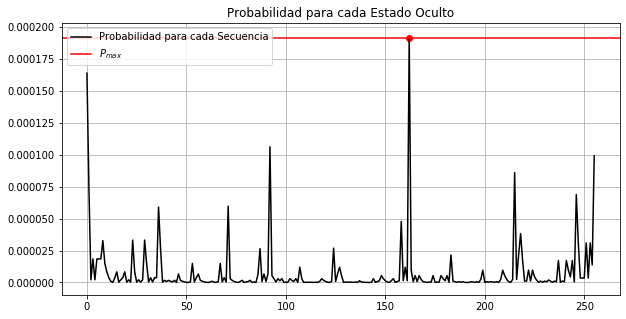

In [12]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()
ax.plot(P,color='k',label="Probabilidad para cada Secuencia")
ax.axhline(y=pMax,color="r",label="$P_{max}$")
ax.scatter(iMax,pMax,color="r")
ax.grid(axis='both')
ax.legend()
plt.title("Probabilidad para cada Estado Oculto")


In [13]:
#Punto C
ObsStates = GetHiddenStates(States,8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [14]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

0.00016384000000000008 [0 0 0 0 0 0 0 0]
7.372800000000004e-05 [0 0 0 0 0 0 0 1]
1.843200000000001e-05 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
1.843200000000001e-05 [0 0 0 0 1 0 0 0]
1.843200000000001e-05 [0 0 0 1 0 0 0 0]
1.843200000000001e-05 [0 0 1 0 0 0 0 0]
1.843200000000001e-05 [0 1 0 0 0 0 0 0]
0.00029491200000000015 [1 0 0 0 0 0 0 0]
0.00013271040000000008 [0 0 0 0 0 0 1 1]
8.294400000000005e-06 [0 0 0 0 0 1 0 1]
3.317760000000002e-05 [0 0 0 0 0 1 1 0]
8.294400000000005e-06 [0 0 0 0 1 0 0 1]
2.073600000000001e-06 [0 0 0 0 1 0 1 0]
3.317760000000002e-05 [0 0 0 0 1 1 0 0]
8.294400000000005e-06 [0 0 0 1 0 0 0 1]
2.073600000000001e-06 [0 0 0 1 0 0 1 0]
2.073600000000001e-06 [0 0 0 1 0 1 0 0]
3.317760000000002e-05 [0 0 0 1 1 0 0 0]
8.294400000000005e-06 [0 0 1 0 0 0 0 1]
2.073600000000001e-06 [0 0 1 0 0 0 1 0]
2.073600000000001e-06 [0 0 1 0 0 1 0 0]
2.073600000000001e-06 [0 0 1 0 1 0 0 0]
3.317760000000002e-05 [0 0 1 1 0 0 0 0]
8.294400000000005e-06 [0 1 0 0 0 0 0 

In [15]:
pMax_o = np.max(PObs)
iMax_o = np.where( PObs == pMax_o)
print(ObsStates[iMax_o],pMax_o)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


Text(0.5, 1.0, 'Probabilidad para cada Estado Observable')

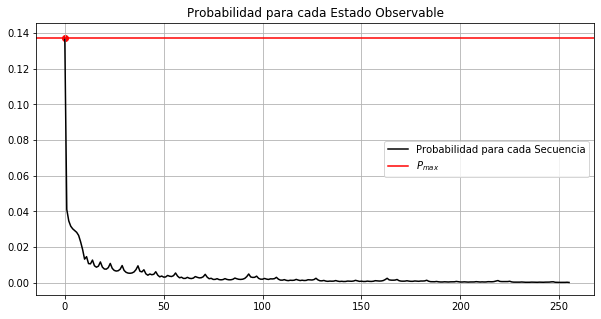

In [16]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()
ax.plot(PObs,color='k',label="Probabilidad para cada Secuencia")
ax.axhline(y=pMax_o,color="r",label="$P_{max}$")
ax.scatter(iMax_o,pMax_o,color="r")
ax.grid(axis='both')
ax.legend()
plt.title("Probabilidad para cada Estado Observable")

In [17]:
#Punto D
np.sum(PObs)

1.0000000000000007

In [18]:
#Punto E

El resultado depende de la probabilidad a-priori, dado que esta es la herramienta utilizada como punto de partida bajo el cual interactua el estado observado con las matriz de transición y de emisión, por lo tanto condiciona las posibilidades calculadas. 
De igual manera, dado que estamos trabajando una cadena de Markov, estas se definen como un proceso estocastico, por esta razón, sabemos que la probabilidad de cada estado esta definida únicamente por el estado inmediatamente anterior:
$$\mathbb{P}(X_0=x_0,X_1=x_1,X_{n+1}=x_{n+1})=\mathbb{P}(X_0=x_0)\mathbb{P}(X_1=x_1)\mathbb{P}(X_{n+1}=x_{n+1})$$
Finalmente, podemos apreciar que para el calculo de la cadena, es necesario dar la condición inicial $X_0$ que representa la probabilidad a priori. 
Por otra parte, en la parte computacional, el prior escogido nos permite hacer el calculo de las probabilidades de los sucesos, funcionando como punto de partida para la función ${\it{GetProb}}$.